### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?


In [12]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [4]:
penguins = sns.load_dataset("penguins")

### Species VS Sex

Ik verwacht dat er geen correlatie zit tussen de pinguïnsoort en geslacht. Ze zullen als het goed is evenveel zijn, niet dat één specifiek pinguinsoort veel meer mannen of vrouwen heeft. Tenzij er kannibalistische gevallen zijn bij een van de geslachten, maar ik ben geen expert in pinguïns.

In [7]:
contingencyTable = penguins.groupby(['species','sex']).size().unstack('species', fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


Er zijn enkel een klein aantal Gentoo pinguïns meer die een mannelijk geslacht heeft. Dit kan toeval zijn, omdat de andere pinguïnsoorten precies gelijk zijn. Zoals ik had verwacht, is er geen correlatie tussen de pinguïnsoorten.

Text(0.5, 1.0, 'Penguin species with their gender')

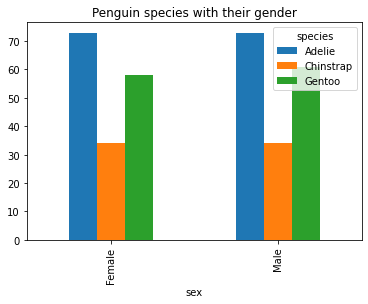

In [10]:
contingencyTable.plot(kind='bar').set_title('Penguin species with their gender')

We zien hier in de bar plot duidelijk dat de pinguïnsoort geen invloed heeft op het geslacht. Het geslacht is namelijk altijd bijna precies 50/50.

In [13]:
chi2_contingency(contingencyTable)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

Hoe acurrater de data, hoe minder procent kans dat er verschil zit in de data. In dit geval is er ruim 97.5% kans dat er geen verschil zit in de data. Er is dus amper tot geen correlatie tussen de pinguïnsoort en het geslacht.

### Island VS Sex

Hier verwacht ik misschien een klein correlatie tussen het eiland en het geslacht. Een bepaald geslacht zit namelijk liever bijeen dan een normale verdeelsleutel (50/50).

In [21]:
contingencyTable_is = penguins.groupby(['island','sex']).size().unstack('island', fill_value=0)
contingencyTable_is

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


Het blijkt dat het geslacht amper tot geen impacht heeft tot het eiland waar een pinguïn zich bevindt. Het grootste verschil is maar een verschil van 3 pinguïns meer.

Text(0.5, 1.0, 'Penguin islands with their gender')

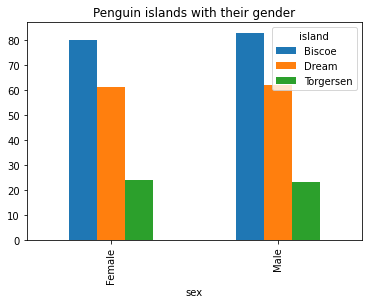

In [22]:
contingencyTable_is.plot(kind='bar').set_title('Penguin islands with their gender')

In de barplot hierboven zie je dat de kolommen bijna identiek zijn. Het geslacht heeft dus geen invloed op het eiland waar een pinguïn zich verblijft. We zullen hierna een chi-squared test doen om het verschil in percentage te weten.

In [23]:
chi2_contingency(contingencyTable_is)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

We zien hier met de chi-squared test, dat er ruim 97.16% kans is dat er geen verschil zit in de data. Dit is een hoog percentage, waar je al bijna direct van kan concluderen dat er geen corrrelatie zit tussen het eiland en het geslacht van een pinguïn.

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?


In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

movies = pd.read_csv (r'movies_1.csv')

In [2]:
movies.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

### Genre VS Lead Studio

Hier kan het zo zijn dat een bepaalde studio in een specifieke genre gespecialiseerd is en van die genre meerdere films maken.

In [8]:
contingencyTable_movie = movies.groupby(['Genre','Lead Studio']).size().unstack('Genre', fill_value=0)
contingencyTable_movie

Genre,Action,Animation,Comedy,Drama,Fantasy,Romance
Lead Studio,,,,,,
20th Century Fox,0,0,0,1,0,1
CBS,0,0,1,0,0,0
Disney,0,4,4,0,0,0
Fox,0,0,6,0,0,0
Independent,0,0,7,4,0,8
Lionsgate,1,0,1,0,0,0
New Line,0,0,1,0,0,0
Paramount,0,0,2,2,0,0
Sony,0,0,2,1,0,1


We zien in de tabel dat Warner Bros. veel comedy films aanbiedt en Disney de enige film studio is die animatie films heeft geproduceerd.

Text(0.5, 1.0, 'Production companies with the production countries')

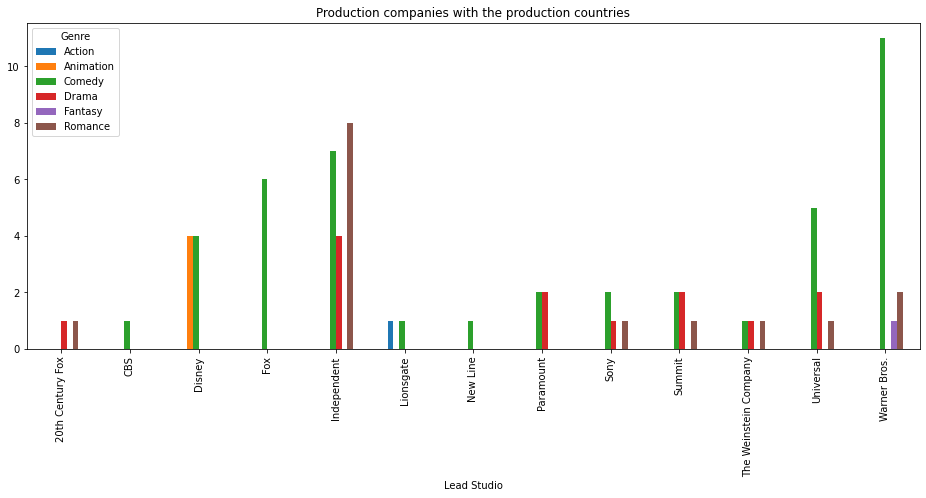

In [4]:
contingencyTable_movie.plot(kind="bar", figsize=(16,6)).set_title('Production companies with the production countries')

We zien hier een hier dat de film studio Independent veel meer romantische films heeft dan bijvoorbeeld Warner Bros. Warner Bros. heeft zelfs geen enkel drama film. Disney film is gespecialiseerd in animatie films zoals je hierboven ziet.

In [5]:
chi2_contingency(contingencyTable_movie)

(106.61890479030015,
 0.0002003429980865472,
 60,
 array([[ 0.02597403,  0.1038961 ,  1.11688312,  0.33766234,  0.02597403,
          0.38961039],
        [ 0.01298701,  0.05194805,  0.55844156,  0.16883117,  0.01298701,
          0.19480519],
        [ 0.1038961 ,  0.41558442,  4.46753247,  1.35064935,  0.1038961 ,
          1.55844156],
        [ 0.07792208,  0.31168831,  3.35064935,  1.01298701,  0.07792208,
          1.16883117],
        [ 0.24675325,  0.98701299, 10.61038961,  3.20779221,  0.24675325,
          3.7012987 ],
        [ 0.02597403,  0.1038961 ,  1.11688312,  0.33766234,  0.02597403,
          0.38961039],
        [ 0.01298701,  0.05194805,  0.55844156,  0.16883117,  0.01298701,
          0.19480519],
        [ 0.05194805,  0.20779221,  2.23376623,  0.67532468,  0.05194805,
          0.77922078],
        [ 0.05194805,  0.20779221,  2.23376623,  0.67532468,  0.05194805,
          0.77922078],
        [ 0.06493506,  0.25974026,  2.79220779,  0.84415584,  0.06493506,
   

We zien hier met de chi-squared test, dat er ruim 0.02% kans is dat er geen verschil zit in de data. Dit is een erg laag percentage. Dit betekent dat er een hele grote kans is dat er een correlatie zit tussen de film studio en genre.